In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing pythom classes and packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from xgboost import XGBClassifier #load ML classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier


In [3]:
#define minmax object for features normalization
scaler = MinMaxScaler(feature_range = (0, 1)) #use to normalize training data

In [10]:
#load and display dataset values
dataset = pd.read_csv("/content/hpc_io_data.csv")
dataset.fillna(0, inplace = True)#replace missing values
dataset

,instructions,LLC-stores,L1-icache-load-misses,branch-load-misses,node-load-misses,rd_req,rd_bytes,wr_req,wr_bytes,flush_operations,rd_total_times,wr_total_times,flush_total_times,label
0,77556160.0,9575.0,257517.0,215949.0,0.0,0,0,8,147456,4,0,3596349,4524778,1
1,32981037.0,16800.0,797990.0,140417.0,2.0,0,0,0,0,0,0,0,0,1
2,11049222.0,5302.0,204689.0,55819.0,0.0,0,0,0,0,0,0,0,0,1
3,4968323.0,5252.0,188982.0,34310.0,0.0,0,0,0,0,0,0,0,0,1
4,15314480.0,11345.0,601098.0,112428.0,0.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,58694891.0,1827.0,9147.0,468151.0,0.0,0,0,0,0,0,0,0,0,0
5996,51471771.0,863.0,3740.0,521066.0,0.0,0,0,0,0,0,0,0,0,0
5997,49304168.0,5280.0,12560.0,480046.0,0.0,0,0,2,28672,1,0,503895,2094439,0
5998,55666764.0,13175.0,53589.0,529373.0,0.0,0,0,0,0,0,0,0,0,0


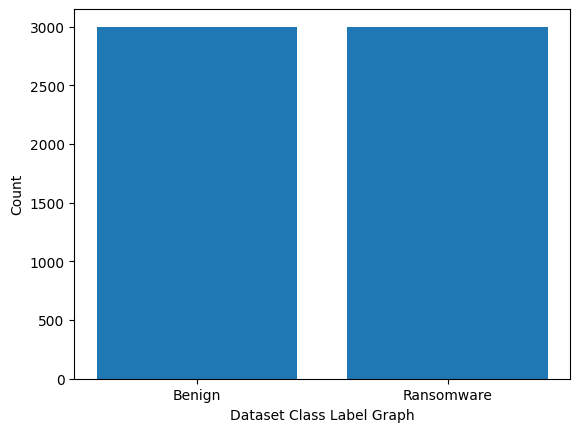

In [11]:
#find and plot graph of ransomware and benign from dataset where 0 label refers as benign and 1 refer as ransomware
#plot labels in dataset
labels, count = np.unique(dataset['label'], return_counts = True)
labels = ['Benign', 'Ransomware']
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Class Label Graph")
plt.ylabel("Count")
plt.show()

In [12]:
#dataset preprocessing such as normalization and shuffling
#data = dataset.values
#X = data[:,1:data.shape[1]-1]
#Y = data[:,data.shape[1]-1]
#Y = Y.astype(int)

#indices = np.arange(X.shape[0])
#np.random.shuffle(indices)#shuffle dataset values
#X = X[indices]
#Y = Y[indices]

#scaler = MinMaxScaler((0,1))
#X = scaler.fit_transform(X)#normalized or transform features
#print("Normalized Features")
#print(X)

In [13]:
dataset.columns

Index(['instructions', 'LLC-stores', 'L1-icache-load-misses',
       'branch-load-misses', 'node-load-misses', 'rd_req', 'rd_bytes',
       'wr_req', 'wr_bytes', 'flush_operations', 'rd_total_times',
       'wr_total_times', 'flush_total_times', 'label'],
      dtype='object')

In [14]:
X = dataset[['instructions', 'LLC-stores', 'L1-icache-load-misses',
       'branch-load-misses', 'node-load-misses', 'rd_req', 'rd_bytes',
       'wr_req', 'wr_bytes', 'flush_operations', 'rd_total_times',
       'wr_total_times', 'flush_total_times']]
Y = dataset['label']

In [15]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print()
print("Dataset train & test split as 80% dataset for training and 20% for testing")
print("Training Size (80%): "+str(X_train.shape[0])) #print training and test size
print("Testing Size (20%): "+str(X_test.shape[0]))
print()


Dataset train & test split as 80% dataset for training and 20% for testing
Training Size (80%): 4800
Testing Size (20%): 1200



In [16]:
#define global variables to calculate and store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

ML_Model = []
acc = []
prec = []
rec = []
f1 = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    acc.append(round(a, 3))
    prec.append(round(b, 3))
    rec.append(round(c, 3))
    f1.append(round(d, 3))

In [17]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    print()
    print(algorithm+' Accuracy  : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FMeasure    : '+str(f))
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    conf_matrix = confusion_matrix(testY, predict)
    plt.figure(figsize =(5, 5))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

In [20]:
#SVM


SVM Accuracy  : 62.5
SVM Precision   : 76.92592923210032
SVM Recall      : 60.911304347826075
SVM FMeasure    : 55.06949251823846


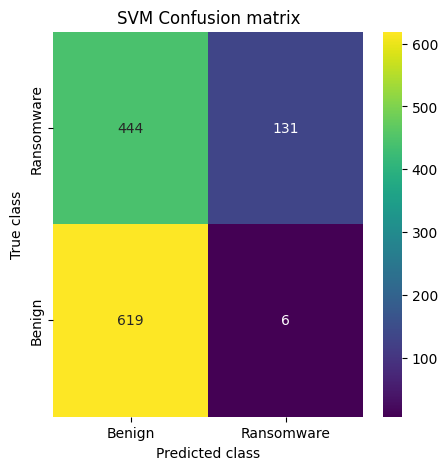

In [21]:
#now train SVM algorithm on training features and then test on testing features to calculate accuracy and other metrics
svm_cls = svm.SVC(kernel="poly", gamma="scale", C=0.004)
svm_cls.fit(X_train, y_train)
predict = svm_cls.predict(X_test)
calculateMetrics("SVM", predict, y_test)

In [22]:
svm_acc = accuracy_score(predict, y_test)
svm_prec = precision_score(predict, y_test,average='macro')
svm_rec = recall_score(predict, y_test,average='macro')
svm_f1 = f1_score(predict, y_test,average='macro')

storeResults('SVM',svm_acc,svm_prec,svm_rec,svm_f1)

In [23]:
#KNN


KNN Accuracy  : 90.25
KNN Precision   : 90.27962159327971
KNN Recall      : 90.18782608695652
KNN FMeasure    : 90.22305228786844


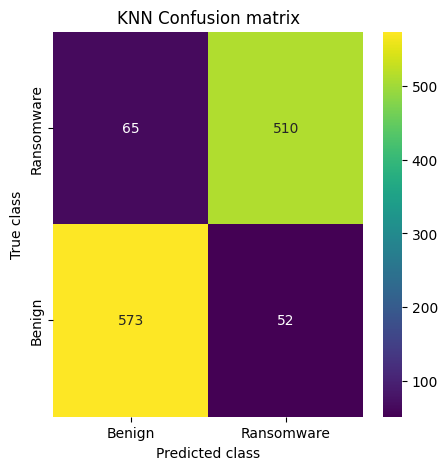

In [24]:
#now training KNN algorithm
knn_cls =  KNeighborsClassifier(n_neighbors=500)
knn_cls.fit(X_train, y_train)
predict = knn_cls.predict(X_test)
calculateMetrics("KNN", predict, y_test)

In [25]:
knn_acc = accuracy_score(predict, y_test)
knn_prec = precision_score(predict, y_test,average='macro')
knn_rec = recall_score(predict, y_test,average='macro')
knn_f1 = f1_score(predict, y_test,average='macro')

storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

In [26]:
#DECISION TREE


Decision Tree Accuracy  : 93.75
Decision Tree Precision   : 93.98622749153147
Decision Tree Recall      : 93.93739130434781
Decision Tree FMeasure    : 93.74978731915182


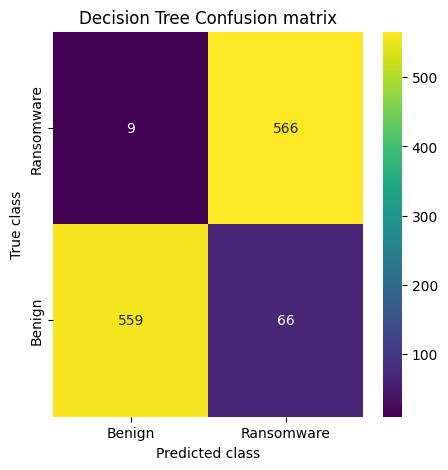

In [27]:
#now train decision tree classifier with hyper parameters
dt_cls = DecisionTreeClassifier(criterion = "entropy",max_leaf_nodes=2,max_features="auto")#giving hyper input parameter values
dt_cls.fit(X_train, y_train)
predict = dt_cls.predict(X_test)
calculateMetrics("Decision Tree", predict, y_test)

In [28]:
dt_acc = accuracy_score(predict, y_test)
dt_prec = precision_score(predict, y_test,average='macro')
dt_rec = recall_score(predict, y_test,average='macro')
dt_f1 = f1_score(predict, y_test,average='macro')

storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1)

In [29]:
#RANDOM FOREST


Random Forest Accuracy  : 98.16666666666667
Random Forest Precision   : 98.23504305691547
Random Forest Recall      : 98.11478260869566
Random Forest FMeasure    : 98.1614369762881


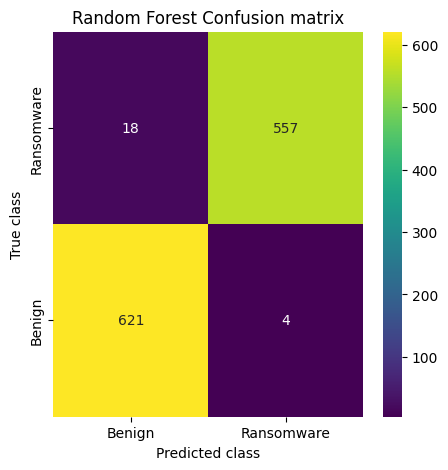

In [30]:
#training random Forest algortihm
rf = RandomForestClassifier(n_estimators=40, criterion='gini', max_features="log2", min_weight_fraction_leaf=0.3)
rf.fit(X_train, y_train)
predict = rf.predict(X_test)
calculateMetrics("Random Forest", predict, y_test)

In [31]:
rf_acc = accuracy_score(predict, y_test)
rf_prec = precision_score(predict, y_test,average='macro')
rf_rec = recall_score(predict, y_test,average='macro')
rf_f1 = f1_score(predict, y_test,average='macro')

storeResults('Random Froest',rf_acc,rf_prec,rf_rec,rf_f1)

In [32]:
#XG BOOST


XGBoost Accuracy  : 98.75
XGBoost Precision   : 98.72791853342375
XGBoost Recall      : 98.78608695652173
XGBoost FMeasure    : 98.74867829144533


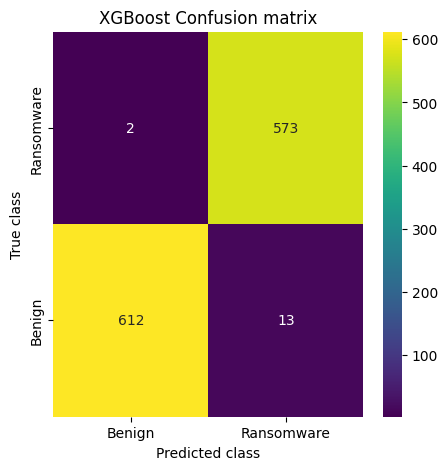

In [33]:
#now train XGBoost algorithm
xgb_cls = XGBClassifier(n_estimators=10,learning_rate=0.09,max_depth=2)
xgb_cls.fit(X_train, y_train)
predict = xgb_cls.predict(X_test)
calculateMetrics("XGBoost", predict, y_test)

In [34]:
rf_acc = accuracy_score(predict, y_test)
rf_prec = precision_score(predict, y_test,average='macro')
rf_rec = recall_score(predict, y_test,average='macro')
rf_f1 = f1_score(predict, y_test,average='macro')

storeResults('XGBoost',rf_acc,rf_prec,rf_rec,rf_f1)

In [35]:
#VOTING CLASSIFIER


Voting Classifier Accuracy  : 99.25
Voting Classifier Precision   : 99.25220692188665
Voting Classifier Recall      : 99.24521739130435
Voting Classifier FMeasure    : 99.24864286116798


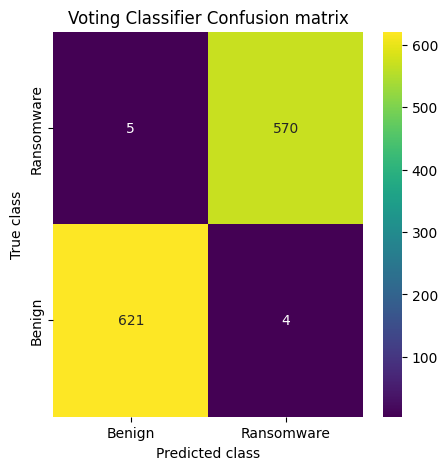

In [36]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
clf1 = AdaBoostClassifier(n_estimators=10, random_state=0)
clf2 = RandomForestClassifier(n_estimators=5, random_state=1)

eclf = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')
eclf.fit(X_train, y_train)

predict = eclf.predict(X_test)
calculateMetrics("Voting Classifier", predict, y_test)

In [37]:
rf_acc = accuracy_score(predict, y_test)
rf_prec = precision_score(predict, y_test,average='macro')
rf_rec = recall_score(predict, y_test,average='macro')
rf_f1 = f1_score(predict, y_test,average='macro')

storeResults('Voting Classifier',rf_acc,rf_prec,rf_rec,rf_f1)

In [38]:
#COMPARISON

In [39]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : acc,
                       'Precision': prec,
                       'Recall'   : rec,
                        'f1_score' : f1,
                      })

In [40]:
result

,ML Model,Accuracy,Precision,Recall,f1_score
0,SVM,0.625,0.609,0.769,0.551
1,KNN,0.902,0.902,0.903,0.902
2,Decision Tree,0.938,0.939,0.940,0.937
3,Random Froest,0.982,0.981,0.982,0.982
4,XGBoost,0.988,0.988,0.987,0.987
5,Voting Classifier,0.992,0.992,0.993,0.992


In [41]:
# MODELLING

In [42]:
import joblib
filename = 'model.sav'
joblib.dump(eclf, filename)

['model.sav']

In [43]:
#GRAPH

In [44]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

In [45]:
#ACCURACY

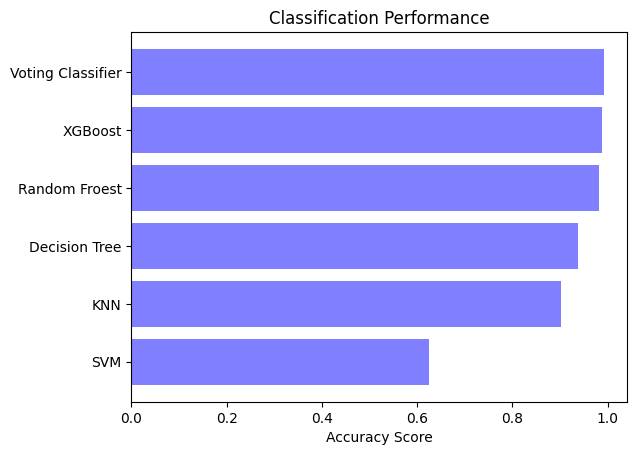

In [46]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, acc, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

In [47]:
#PRECISION

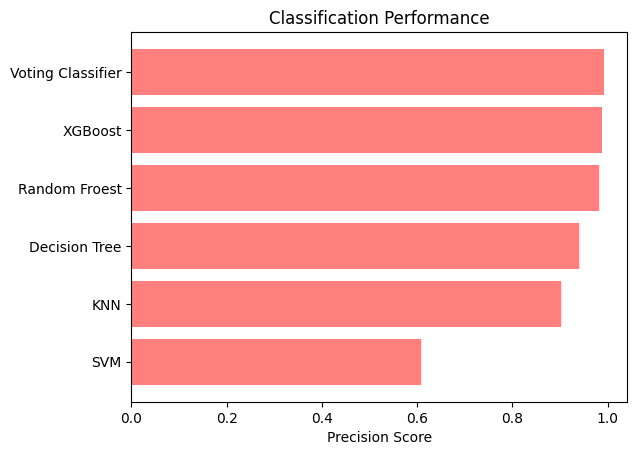

In [48]:
plt2.barh(y_pos, prec, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

In [49]:
#RECALL

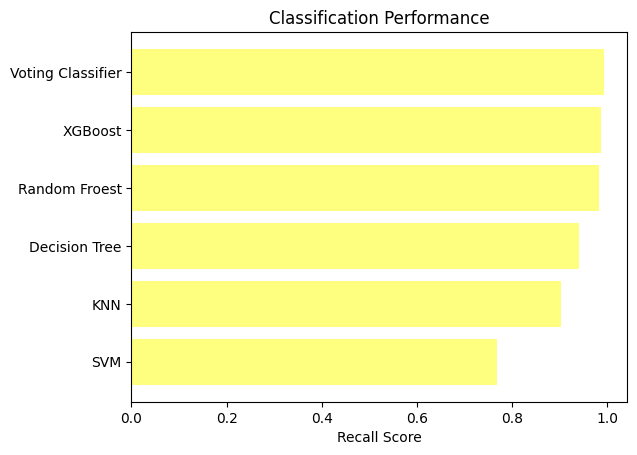

In [50]:
plt2.barh(y_pos, rec, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

In [51]:
#F1 SCORE

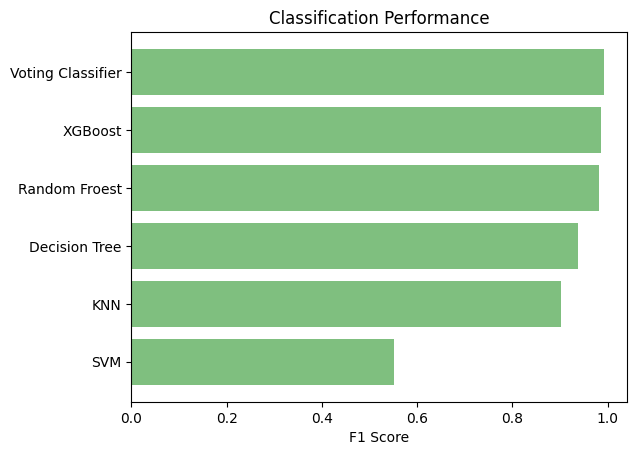

In [52]:
plt2.barh(y_pos, f1, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()